In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns


In [47]:
IMG_SIZE = 32
NUM_CLASSES = 43

def load_data(data_dir):
    images, labels = [], []
    for label in range(NUM_CLASSES):
        path = os.path.join(data_dir, str(label))
        count = 0
        for img_name in os.listdir(path):
            img_path = os.path.join(path, img_name)
            count += 1
            if count >= 1100:
                break
            try:
                img = Image.open(img_path).resize((IMG_SIZE, IMG_SIZE))
                img = np.array(img)
                images.append(img)
                labels.append(label)
            except:
                continue
        print(f"Loaded {count} images for label {label}")
    
    return np.array(images), np.array(labels)

def count_images(data_dir):
    count = 0
    dir = {}
    for label in range(NUM_CLASSES):
        path = os.path.join(data_dir, str(label))
        count += len(os.listdir(path))
        dir[label] = len(os.listdir(path))
    return count, dir

class_names = [
    "Speed limit 20", "Speed limit 30", "Speed limit 50", "Speed limit 60",
    "Speed limit 70", "Speed limit 80", "End of speed limit 80", "Speed limit 100",
    "Speed limit 120", "No passing", "No passing for trucks", "Right-of-way at intersection",
    "Priority road", "Yield", "Stop", "No vehicles", "No trucks",
    "No entry", "General caution", "Dangerous curve left", "Dangerous curve right",
    "Double curve", "Bumpy road", "Slippery road", "Road narrows on the right",
    "Road work", "Traffic signals", "Pedestrians", "Children crossing",
    "Bicycles crossing", "Beware of ice/snow", "Wild animals crossing",
    "End of all restrictions", "Turn right ahead", "Turn left ahead",
    "Ahead only", "Go straight or right", "Go straight or left", "Keep right",
    "Keep left", "Roundabout", "End of no passing", "End of no passing for trucks"
]

def predict_image(model,img_path):
    img = Image.open(img_path).resize((IMG_SIZE, IMG_SIZE))
    img = np.array(img).astype('float32') / 255.0
    pred = model.predict(np.expand_dims(img, axis=0))
    print(pred[0][np.argmax(pred[0])])
    plt.imshow(img)
    plt.bar(np.arange(NUM_CLASSES),pred[0])
    plt.title('Prediction Distribution')
    return class_names[np.argmax(pred)]


Loaded 210 images for label 0
Loaded 1100 images for label 1
Loaded 1100 images for label 2
Loaded 1100 images for label 3
Loaded 1100 images for label 4
Loaded 1100 images for label 5
Loaded 420 images for label 6
Loaded 1100 images for label 7
Loaded 1100 images for label 8
Loaded 1100 images for label 9
Loaded 1100 images for label 10
Loaded 1100 images for label 11
Loaded 1100 images for label 12
Loaded 1100 images for label 13
Loaded 780 images for label 14
Loaded 630 images for label 15
Loaded 420 images for label 16
Loaded 1100 images for label 17
Loaded 1100 images for label 18
Loaded 210 images for label 19
Loaded 360 images for label 20
Loaded 330 images for label 21
Loaded 390 images for label 22
Loaded 510 images for label 23
Loaded 270 images for label 24
Loaded 1100 images for label 25
Loaded 600 images for label 26
Loaded 240 images for label 27
Loaded 540 images for label 28
Loaded 270 images for label 29
Loaded 450 images for label 30
Loaded 780 images for label 31
Loa

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 10)     │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 30, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 20)     │         1,820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 13, 13, 20)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 720)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 720)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 60)             │        43,260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 60)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │         2,623 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,983 (187.43 KB)

 Trainable params: 47,983 (187.43 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
292/292 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.0924 - loss: 3.5060 - val_accuracy: 0.4350 - val_loss: 2.4209
Epoch 2/15
292/292 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.3587 - loss: 2.2614 - val_accuracy: 0.6811 - val_loss: 1.4815
Epoch 3/15
292/292 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5172 - loss: 1.5912 - val_accuracy: 0.7937 - val_loss: 1.0570
Epoch 4/15
292/292 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5880 - loss: 1.2987 - val_accuracy: 0.8344 - val_loss: 0.7952
Epoch 5/15
292/292 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6461 - loss: 1.1206 - val_accuracy: 0.8685 - val_loss: 0.7063
Epoch 6/15
292/292 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6579 - loss: 1.0419 - val_accuracy: 0.8848 - val_loss: 0.6003
Epoch 7/15
292/292 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6924 - loss: 0.9375 - val_accuracy: 0.9017 - val_loss: 0.5487
Epoch 8/15
292/292 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7153 - loss: 0.8782 - val_accurac

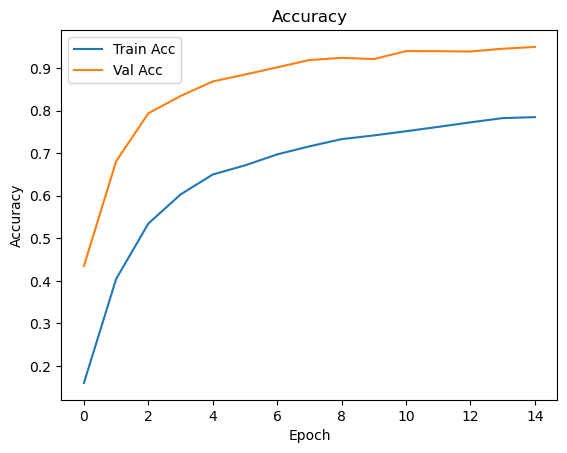

183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9542 - loss: 0.2848
Validation Accuracy: 95.32%


In [19]:
MODEL_PATH = 'cnn_model_v03.h5'

try:
    model = keras.models.load_model(MODEL_PATH)
except:
    X, y = load_data('GTSRB/Train')
    X = X.astype('float32') / 255.0
    y = to_categorical(y, NUM_CLASSES)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    model = Sequential([
        keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),
        Conv2D(10, (3, 3), activation='relu'),
        Dropout(0.2),
        MaxPooling2D(2, 2),
        Conv2D(20, (3, 3), activation='relu'),
        Dropout(0.2),
        MaxPooling2D(2, 2),
        Flatten(),
        Dropout(0.2),
        Dense(60, activation='relu'),
        Dropout(0.5),
        Dense(NUM_CLASSES, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    model.save('cnn_model_v03.h5')

    history = model.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


    val_loss, val_accuracy = model.evaluate(X_val, y_val)
    print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

In [ ]:
import json

with open('history.json', 'w') as f:
    json.dump(history.history, f)


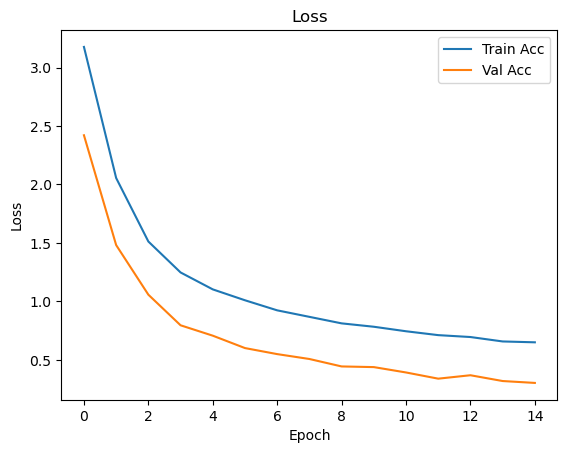

In [24]:
plt.plot(history.history['loss'], label='Train Acc')
plt.plot(history.history['val_loss'], label='Val Acc')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Test Accuracy: 0.9532
Classification Report:
                              precision    recall  f1-score   support

              Speed limit 20       1.00      0.65      0.79        34
              Speed limit 30       0.86      0.97      0.91       195
              Speed limit 50       0.96      0.82      0.88       212
              Speed limit 60       0.91      0.85      0.88       225
              Speed limit 70       0.97      0.98      0.98       218
              Speed limit 80       0.78      0.91      0.84       222
       End of speed limit 80       0.92      0.99      0.95        69
             Speed limit 100       0.91      0.93      0.92       217
             Speed limit 120       0.96      0.92      0.94       232
                  No passing       0.98      0.97      0.98       243
       No passing for trucks       0.97      0.99      0.98       226
Right-of-way at intersection       0.98      0.97      0.98       231
               Priority road       0.99     

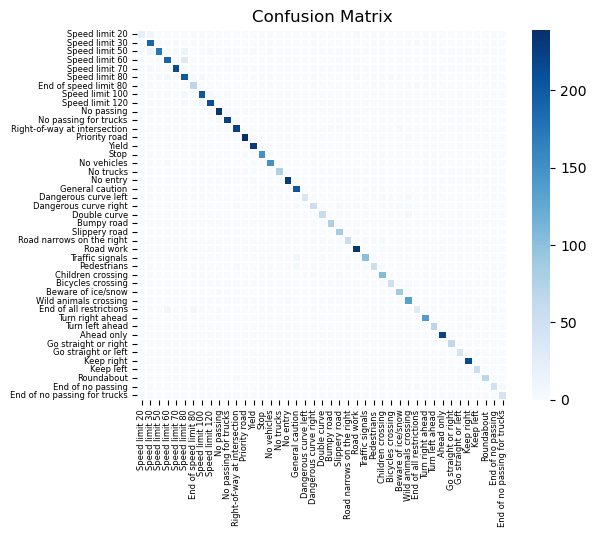

<Figure size 2000x2000 with 0 Axes>

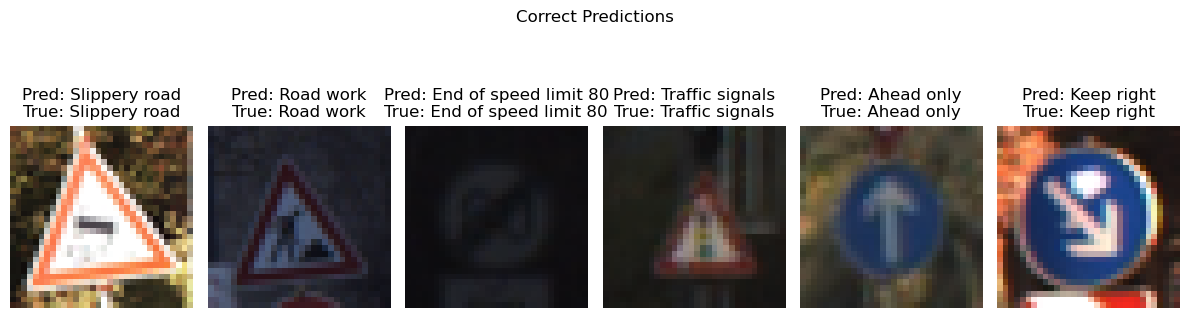

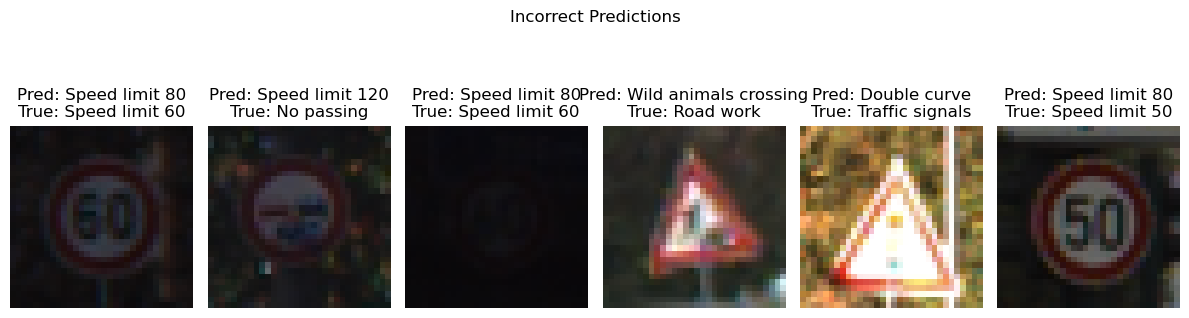

In [ ]:
y_pred_probs = model.predict(X_val)
y_pred = np.argmax(y_pred_probs, axis=1)


# Accuracy
accuracy = np.mean(y_pred == np.argmax(y_val, axis=1))
print(f"Test Accuracy: {accuracy:.4f}")

# Classification report
print("Classification Report:")
print(classification_report(np.argmax(y_val, axis=1), y_pred, target_names=class_names))

# Confusion matrix
cm = confusion_matrix(np.argmax(y_val, axis=1), y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
sns.heatmap(cm, cmap='Blues', xticklabels=class_names, yticklabels=class_names, cbar=True, square=True, linewidths=0.3, annot=False)


plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.title("Confusion Matrix")
plt.figure(figsize=(20, 20))
plt.show()


def plot_examples(X, y_true, y_pred, class_names, correct=True, num_images=6):
    idxs = np.where((y_true == y_pred) if correct else (y_true != y_pred))[0]
    idxs = np.random.choice(idxs, size=min(len(idxs), num_images), replace=False)

    plt.figure(figsize=(12, 4))
    for i, idx in enumerate(idxs):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(X[idx])
        plt.title(f"Pred: {class_names[y_pred[idx]]}\nTrue: {class_names[y_true[idx]]}")
        plt.axis("off")
    plt.suptitle("Correct Predictions" if correct else "Incorrect Predictions")
    plt.tight_layout()
    plt.show()


plot_examples(X_val, np.argmax(y_val, axis=1), y_pred, class_names, correct=True)
plot_examples(X_val, np.argmax(y_val, axis=1), y_pred, class_names, correct=False)